Supernatural vs normal


In [50]:
import random

def flip_coin():
    """Simulate flipping a coin, returning 1 or 2."""
    return random.randint(1, 2)

def roll_dice():
    """Simulate rolling a dice, returning 1, 2, 3, or 4."""
    return random.randint(1, 4)

def player_move(current_position, move):
    """Calculate player's new position after making a move."""
    new_position = current_position + move
    if new_position > 9 or new_position == 6:  # Reset to 1 if moving beyond 9
        return 1
    return new_position

def jump_to_good_position():
    """Use supernatural ability to jump to a favorable position."""
    return random.choice([7])  # Assuming these are favorable positions

def move_opponent_back(current_position):
    """Use supernatural ability to make the opponent move back one step."""
    return max(1, current_position - 1)  # Ensure not less than 1


In [51]:
def simulate_game_general():
    """Simulate a single game and return the winning player."""
    player1_position = 1
    player2_position = 1
    
    while True:
        # Player 1's choice
        if player1_position > 7:
            player1_choice = random.choice(['coin','jump','back'])
        else:
            player1_choice = random.choice(['coin','dice', 'jump', 'back'])
            
        if player1_choice == 'coin':
            player1_position = player_move(player1_position, flip_coin())
        elif player1_choice == 'dice':
            player1_position = player_move(player1_position, roll_dice())
        elif player1_choice == 'jump':
            player1_position = jump_to_good_position()
        elif player1_choice == 'back':
            player2_position = move_opponent_back(player2_position)
            
        if player1_position == 9:
            return 1

        # Player 2 uses dice
        player2_choice = random.choice(['coin','dice'])
        if player2_choice == 'coin':
            player2_position = player_move(player2_position, flip_coin())
        elif player2_choice == 'dice':
             player2_position = player_move(player2_position, roll_dice())
                
        if player2_position == 9:
            return 2

In [52]:
def simulate_game_with_strategy():
    """Simulate a single game with player 1's strategy and return the winning player."""
    player1_position = 1
    player2_position = 1
    prime_jump_used = False  # Track if the prime number jump has been used
    
    while True:
        # Player 1's strategy
        if player1_position < 7:
            player1_position = player_move(player1_position, roll_dice())
        else:
            player1_position = player_move(player1_position, flip_coin())
            
        # Apply prime number jump to 7 once
        if not prime_jump_used and player1_position in [2, 3, 5]:
            player1_position = 7
            prime_jump_used = True
        
        # Apply opponent setback when opponent is beyond 7
        if player2_position > 5:
            player2_position = move_opponent_back(player2_position)
            
        if player1_position == 9:
            return 1

        # Player 2 uses dice
        player2_choice = random.choice(['coin','dice'])
        if player2_choice == 'coin':
            player2_position = player_move(player2_position, flip_coin())
        elif player2_choice == 'dice':
             player2_position = player_move(player2_position, roll_dice())
                
        if player2_position == 9:
            return 2


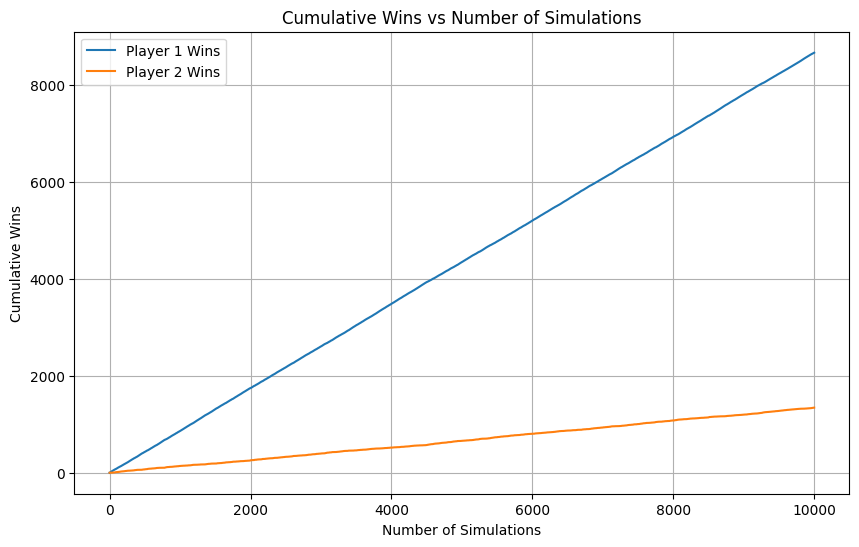

In [53]:
import matplotlib.pyplot as plt
# Initialize variables
num_simulations = 10000
results = {1: 0, 2: 0}  # Count of wins for each player
win_counts = [[0, 0]]  # To track win counts over simulations for plotting

# Run simulations and track results
for i in range(1, num_simulations + 1):
    winner = simulate_game_with_strategy()
    results[winner] += 1
    win_counts.append([results[1], results[2]])

# Separate win counts for plotting
player1_wins, player2_wins = zip(*win_counts)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(player1_wins, label="Player 1 Wins")
plt.plot(player2_wins, label="Player 2 Wins")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Wins")
plt.title("Cumulative Wins vs Number of Simulations")
plt.legend()
plt.grid(True)
plt.show()

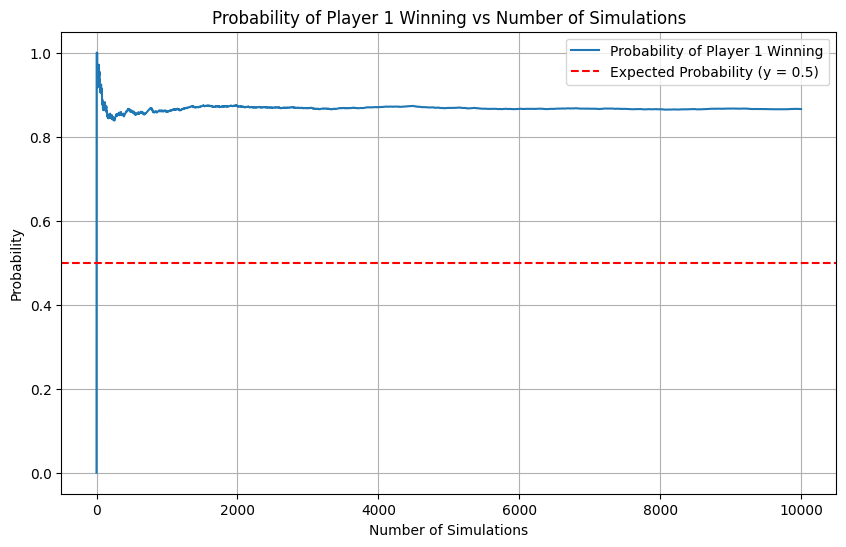

In [54]:
# Calculate the probability of Player 1 winning after each simulation
probabilities_p1_wins = [wins[0] / i if i > 0 else 0 for i, wins in enumerate(win_counts)]

# Generate the plot for the probability of Player 1 winning vs. number of simulations
plt.figure(figsize=(10, 6))
plt.plot(probabilities_p1_wins, label="Probability of Player 1 Winning")
plt.axhline(y=0.5, color='r', linestyle='--', label='Expected Probability (y = 0.5)')
plt.xlabel("Number of Simulations"),
plt.ylabel("Probability")
plt.title("Probability of Player 1 Winning vs Number of Simulations")
plt.legend()

plt.grid(True)
plt.show()

In [86]:
import random

def flip_coin():
    """Simulate flipping a coin, returning 1 or 2."""
    return random.randint(1, 2)

def roll_dice():
    """Simulate rolling a dice, returning 1, 2, 3, or 4."""
    return random.randint(1, 4)

def player_move(current_position, move):
    """Calculate player's new position after making a move."""
    new_position = current_position + move
    if new_position > 250 or new_position == 6:  # Reset to 1 if moving beyond 9
        return 1
    return new_position

def jump_to_good_position():
    """Use supernatural ability to jump to a favorable position."""
    return random.choice([max_prime(250)])  # Assuming these are favorable positions

def move_opponent_back(current_position):
    """Use supernatural ability to make the opponent move back one step."""
    return max(1, current_position - 1)  # Ensure not less than 1

    

In [79]:
def is_prime(n):
    """Check if a number is prime."""
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def max_prime(input_num):
    """Return the largest prime number between 1 and the input number."""
    for num in range(input_num, 1, -1):
        if is_prime(num):
            return num
    return None

In [87]:
def simulate_game_general():
    """Simulate a single game and return the winning player."""
    player1_position = 1
    player2_position = 1
    
    while True:
        # Player 1's choice
        if player1_position > 250:
            player1_choice = random.choice(['coin','jump','back'])
        else:
            player1_choice = random.choice(['coin','dice', 'jump', 'back'])
            
        if player1_choice == 'coin':
            player1_position = player_move(player1_position, flip_coin())
        elif player1_choice == 'dice':
            player1_position = player_move(player1_position, roll_dice())
        elif player1_choice == 'jump':
            player1_position = jump_to_good_position()
        elif player1_choice == 'back':
            player2_position = move_opponent_back(player2_position)
            
        if player1_position == 250:
            return 1

        # Player 2 uses dice
        player2_choice = random.choice(['coin','dice'])
        if player2_choice == 'coin':
            player2_position = player_move(player2_position, flip_coin())
        elif player2_choice == 'dice':
             player2_position = player_move(player2_position, roll_dice())
                
        if player2_position == 250:
            return 2

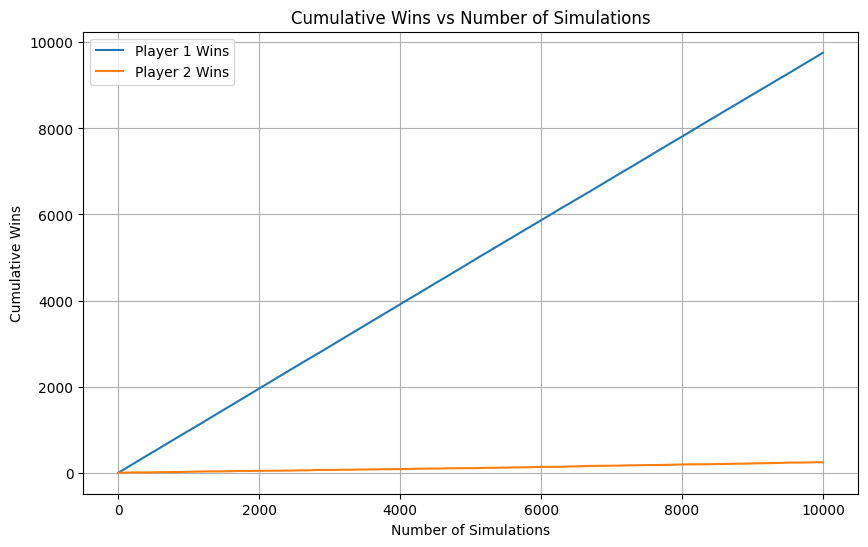

In [88]:
import matplotlib.pyplot as plt
# Initialize variables
num_simulations = 10000
results = {1: 0, 2: 0}  # Count of wins for each player
win_counts = [[0, 0]]  # To track win counts over simulations for plotting

# Run simulations and track results
for i in range(1, num_simulations + 1):
    winner = simulate_game_general()
    results[winner] += 1
    win_counts.append([results[1], results[2]])

# Separate win counts for plotting
player1_wins, player2_wins = zip(*win_counts)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(player1_wins, label="Player 1 Wins")
plt.plot(player2_wins, label="Player 2 Wins")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Wins")
plt.title("Cumulative Wins vs Number of Simulations")
plt.legend()
plt.grid(True)
plt.show()

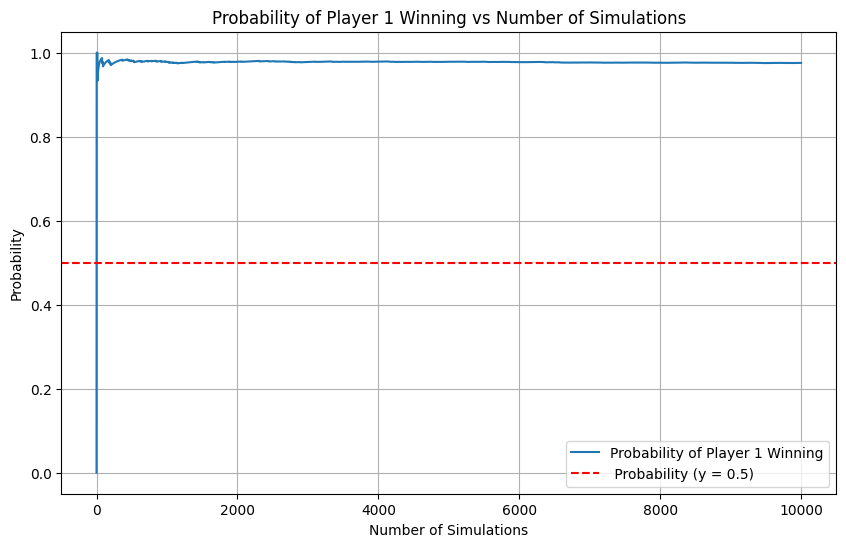

In [89]:
# Calculate the probability of Player 1 winning after each simulation
probabilities_p1_wins = [wins[0] / i if i > 0 else 0 for i, wins in enumerate(win_counts)]

# Generate the plot for the probability of Player 1 winning vs. number of simulations
plt.figure(figsize=(10, 6))
plt.plot(probabilities_p1_wins, label="Probability of Player 1 Winning")
plt.axhline(y=0.5, color='r', linestyle='--', label=' Probability (y = 0.5)')
plt.xlabel("Number of Simulations"),
plt.ylabel("Probability")
plt.title("Probability of Player 1 Winning vs Number of Simulations")
plt.legend()

plt.grid(True)
plt.show()